In [1]:
import math
import numpy as np
#import h5py
import matplotlib.pyplot as plt
#from matplotlib.pyplot import imread
#import scipy
#from PIL import Image
#i#ort pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
#from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()

In [3]:
Y_test_orig.shape

(10000,)

In [4]:
X_train_orig[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
forma_w = X_train_orig[0].shape

print(forma_w )


(28, 28)


In [6]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig
Y_test = Y_test_orig

In [7]:
#VOY A NORMALIZAR LA ENTRADA ENTRE -1 Y 1 ahora
X_train = (X_train *2)-1
X_test = (X_test *2)-1

In [8]:
X_train[0]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [9]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape)) #CONTIENE UN NUMERO CON LA CLASE DE LOS 5000 DE ENTRENAMIENTO
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


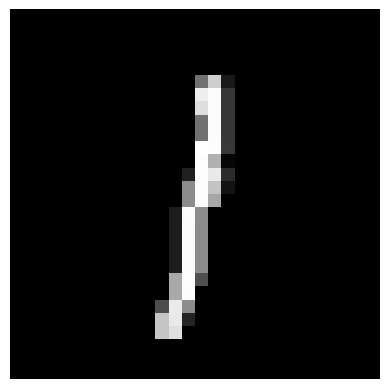

In [10]:
index=124
plt.imshow(X_train_orig[index], cmap='gray') # Mostrar la imagen en escala de grises
plt.axis('off')  # Desactivar ejes
plt.show()

In [11]:
forma_w = X_train_orig[0].shape

print(forma_w )

(28, 28)


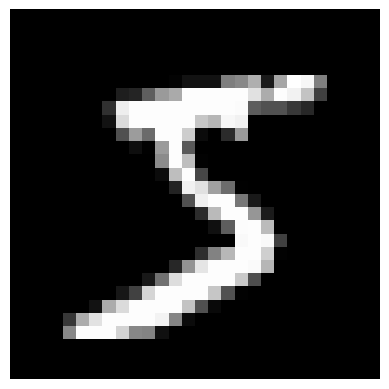

In [12]:
plt.imshow(X_train_orig[0], cmap='gray') 
plt.axis('off')  # Desactivar ejes
plt.show()

In [13]:
# Obtener las clases únicas
classes = np.unique(Y_train)

# Imprimir las clases
print("Clases del conjunto de datos MNIST:")
for cls in classes:
    print(cls)

Clases del conjunto de datos MNIST:
0
1
2
3
4
5
6
7
8
9


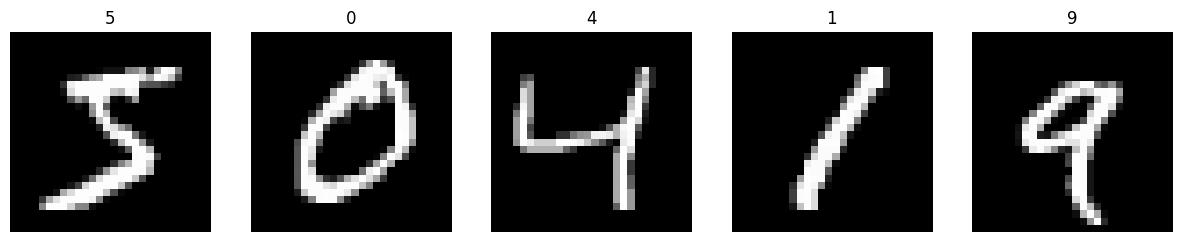

In [14]:
# Definir las clases correspondientes a cada número de etiqueta para MNIST
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Visualizar las clases asociadas con algunas imágenes
num_images = 5
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

for i in range(num_images):
    axes[i].imshow(X_train_orig[i], cmap='gray') # Mostrar la imagen en escala de grises
    axes[i].set_title(class_names[Y_train_orig[i]])
    axes[i].axis('off')

plt.show()

In [15]:
Y_train[0]

5

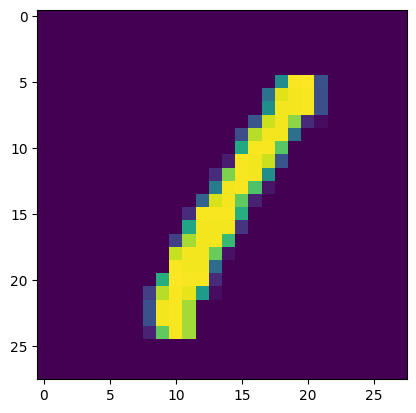

In [16]:
index = 3
plt.imshow(X_train[index]) #display sample training image
plt.show()

In [17]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

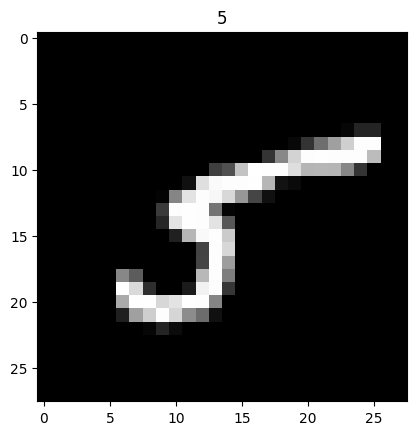

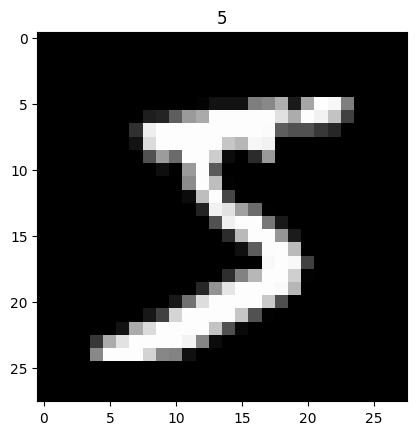

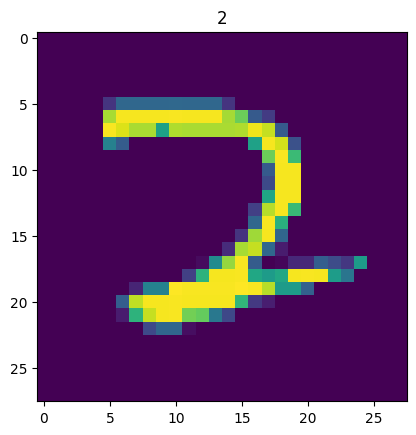

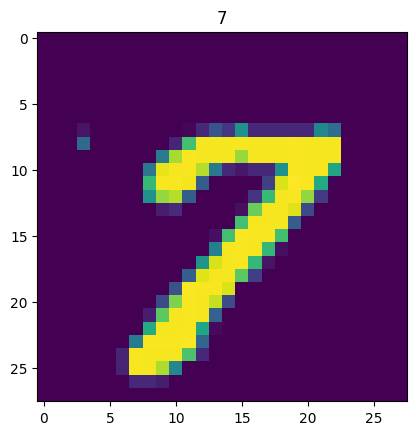

In [18]:
index = 65
plt.imshow(X_train[index],cmap='gray') #display sample training image
plt.title(Y_train[index])
plt.show()
index = 0
plt.imshow(X_train[index],cmap='gray') #display sample training image
plt.title(Y_train[index])
plt.show()
index = 530
plt.imshow(X_train[index]) #display sample training image
plt.title(Y_train[index])
plt.show()
index = 753
plt.imshow(X_train[index]) #display sample training image
plt.title(Y_train[index])
plt.show()

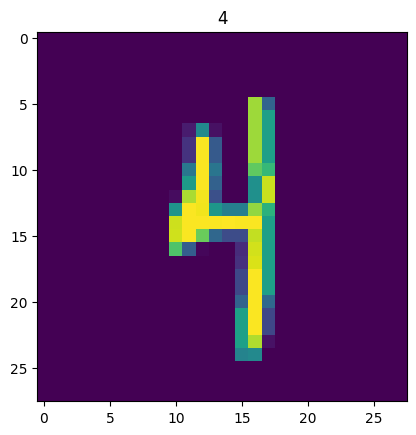

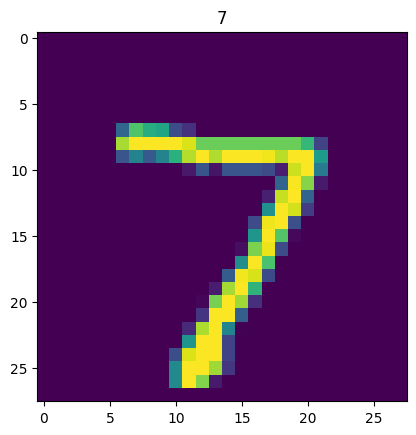

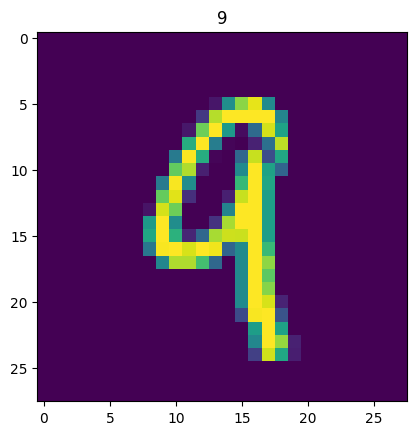

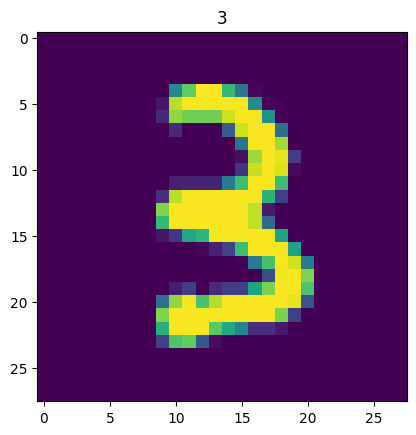

In [19]:
index = 65
plt.imshow(X_test[index]) #display sample training image
plt.title(Y_test[index])
plt.show()
index = 0
plt.imshow(X_test[index]) #display sample training image
plt.title(Y_test[index])
plt.show()
index = 530
plt.imshow(X_test[index]) #display sample training image
plt.title(Y_test[index])
plt.show()
index = 753
plt.imshow(X_test[index]) #display sample training image
plt.title(Y_test[index])
plt.show()

In [20]:
# GRADED FUNCTION: happyModel

def ModelLeNet5_Seq():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
        tfl.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
        tfl.MaxPooling2D(pool_size=(2, 2)),
        tfl.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
        tfl.MaxPooling2D(pool_size=(2, 2)),
        tfl.Flatten(),
        tfl.Dense(units=120, activation='relu'), #ELLOS PONEN 128, EN INTERNET LENET 5 ES 120
        tfl.Dense(units=84, activation='relu'),
        tfl.Dense(units=10, activation='softmax')
    ])
    return model

In [21]:
from tensorflow.keras import initializers

def ModelLeNet5():
    # Establecer semillas aleatorias para NumPy
    tf.random.set_seed(64)
    # Define la entrada
    input_layer = tf.keras.Input(shape=(28, 28, 1))

    # Primera capa convolucional
    conv1 = tfl.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', kernel_initializer=initializers.he_uniform())(input_layer)
    # Primera capa de pooling
    pool1 = tfl.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Segunda capa convolucional
    conv2 = tfl.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', kernel_initializer=initializers.he_uniform())(pool1)
    # Segunda capa de pooling
    pool2 = tfl.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Aplanar la salida para conectar con capas totalmente conectadas
    flatten = tfl.Flatten()(pool2)
    # Primera capa totalmente conectada
    fc1 = tfl.Dense(units=120, activation='relu', kernel_initializer=initializers.he_uniform())(flatten)
    # Segunda capa totalmente conectada
    fc2 = tfl.Dense(units=84, activation='relu', kernel_initializer=initializers.he_uniform())(fc1)
    # Capa de salida
    output_layer = tfl.Dense(units=10, activation='softmax', kernel_initializer=initializers.he_uniform())(fc2)

    # Crea el modelo
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    return model




In [22]:
from tensorflow.keras import initializers

def MNSIT_model():
    # Establecer semillas aleatorias para NumPy
    tf.random.set_seed(64)
    # Define la entrada
    input_layer = tf.keras.Input(shape=(28, 28, 1))

    # Primera capa convolucional
    conv1 = tfl.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', kernel_initializer=initializers.he_uniform())(input_layer)
    # Primera capa de pooling
    pool1 = tfl.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Segunda capa convolucional
    conv2 = tfl.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', kernel_initializer=initializers.he_uniform())(pool1)
    # Segunda capa de pooling
    pool2 = tfl.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Aplanar la salida para conectar con capas totalmente conectadas
    flatten = tfl.Flatten()(pool2)
    # Primera capa totalmente conectada
    fc1 = tfl.Dense(units=120, activation='relu', kernel_initializer=initializers.he_uniform())(flatten)
    # Segunda capa totalmente conectada
    fc2 = tfl.Dense(units=84, activation='relu', kernel_initializer=initializers.he_uniform())(fc1)
    # Capa de salida
    output_layer = tfl.Dense(units=10, activation='softmax', kernel_initializer=initializers.he_uniform())(fc2)

    # Crea el modelo
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    return model


In [23]:
cifar10_Sequential = ModelLeNet5_Seq()
# Print a summary for each layer
#for layer in summary(cifar10_Sequential):
#    print(layer)

cifar10_model = ModelLeNet5()
MNSIT_model= ModelLeNet5()
# Print a summary for each layer
#for layer in summary(cifar10_model):
#    print(layer)

C:\Users\Jorge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005) 
cifar10_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [25]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.005) 
MNSIT_model.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
MNSIT_model.fit(X_train, Y_train, epochs=5, batch_size=64)

#sparse_categorical_crossentropy es una función de pérdida utilizada comúnmente en problemas de
#clasificación multiclase donde las etiquetas son enteros en lugar de codificación one-hot.

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8672 - loss: 0.4459
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9747 - loss: 0.0808
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9813 - loss: 0.0615
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9825 - loss: 0.0560
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0496


In [26]:
cifar10_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Establecer semillas aleatorias para NumPy
#np.random.seed(64)

# Establecer semillas aleatorias para TensorFlow
#tf.random.set_seed(64)
cifar10_model.fit(X_train, Y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8708 - loss: 0.4295
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9753 - loss: 0.0848
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9806 - loss: 0.0652
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9826 - loss: 0.0568
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0562


In [28]:

MNSIT_model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0903


[0.08120251446962357, 0.9779000282287598]

In [29]:
MNSIT_model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9743 - loss: 0.0903


[0.08120251446962357, 0.9779000282287598]

In [30]:
# Obtener los pesos y sesgos de cada capa
for layer in cifar10_model.layers:
    print("Capa:", layer.name)
    weights = layer.get_weights()
    if weights:
        for i, w in enumerate(weights):
            print("  Pesos {}:".format(i), w.shape)
    else:
        print("  No tiene pesos")

Capa: input_layer_1
  No tiene pesos
Capa: conv2d_2
  Pesos 0: (5, 5, 1, 6)
  Pesos 1: (6,)
Capa: max_pooling2d_2
  No tiene pesos
Capa: conv2d_3
  Pesos 0: (5, 5, 6, 16)
  Pesos 1: (16,)
Capa: max_pooling2d_3
  No tiene pesos
Capa: flatten_1
  No tiene pesos
Capa: dense_3
  Pesos 0: (256, 120)
  Pesos 1: (120,)
Capa: dense_4
  Pesos 0: (120, 84)
  Pesos 1: (84,)
Capa: dense_5
  Pesos 0: (84, 10)
  Pesos 1: (10,)


In [31]:
for layer in cifar10_model.layers:
    print("Capa:", layer.name)
    weights = layer.get_weights()
    if weights:
        for i, w in enumerate(weights):
            print("  Pesos {}:".format(i))
            print(w)
    else:
        print("  No tiene pesos")

Capa: input_layer_1
  No tiene pesos
Capa: conv2d_2
  Pesos 0:
[[[[ 2.19555497e-01  1.73760027e-01 -9.81607288e-02 -1.13597453e-01
    -4.42292914e-02  1.49193689e-01]]

  [[-2.17022344e-01 -2.55391091e-01 -9.90017951e-02 -3.01958038e-03
    -2.95470357e-01 -1.12610415e-01]]

  [[-1.91985425e-02  1.24805704e-01  1.42215133e-01  1.02632362e-02
    -1.57732308e-01  1.66655734e-01]]

  [[ 1.03215851e-01  1.67655140e-01  3.01931471e-01 -9.82632861e-02
    -4.02412057e-01  3.85760307e-01]]

  [[-2.69902423e-02 -7.13441223e-02  2.24321648e-01 -8.41102563e-03
    -1.93327993e-01 -3.29119951e-01]]]


 [[[ 1.90624278e-02  1.85152888e-02  2.10329086e-01 -4.95883554e-01
     3.70618939e-01 -1.18360825e-01]]

  [[ 1.38186216e-01  2.49636680e-01 -4.51277643e-01  2.55131125e-02
     2.10754827e-01 -1.81262448e-01]]

  [[-3.31636548e-01 -1.55681861e-04  5.15317559e-01  1.42306075e-01
     3.25134873e-01  1.78448156e-01]]

  [[-3.32314581e-01  5.06490111e-01 -1.18891686e-01  1.19477674e-01
    -1.4399

In [32]:
conv_weights = cifar10_model.get_weights()
print(conv_weights)


[array([[[[ 2.19555497e-01,  1.73760027e-01, -9.81607288e-02,
          -1.13597453e-01, -4.42292914e-02,  1.49193689e-01]],

        [[-2.17022344e-01, -2.55391091e-01, -9.90017951e-02,
          -3.01958038e-03, -2.95470357e-01, -1.12610415e-01]],

        [[-1.91985425e-02,  1.24805704e-01,  1.42215133e-01,
           1.02632362e-02, -1.57732308e-01,  1.66655734e-01]],

        [[ 1.03215851e-01,  1.67655140e-01,  3.01931471e-01,
          -9.82632861e-02, -4.02412057e-01,  3.85760307e-01]],

        [[-2.69902423e-02, -7.13441223e-02,  2.24321648e-01,
          -8.41102563e-03, -1.93327993e-01, -3.29119951e-01]]],


       [[[ 1.90624278e-02,  1.85152888e-02,  2.10329086e-01,
          -4.95883554e-01,  3.70618939e-01, -1.18360825e-01]],

        [[ 1.38186216e-01,  2.49636680e-01, -4.51277643e-01,
           2.55131125e-02,  2.10754827e-01, -1.81262448e-01]],

        [[-3.31636548e-01, -1.55681861e-04,  5.15317559e-01,
           1.42306075e-01,  3.25134873e-01,  1.78448156e-01]]

In [34]:
maximo = tf.reduce_max(w_pesos_conv_1)
print(maximo)
minimo= tf.reduce_min(w_pesos_conv_1)
print(minimo)

tf.Tensor(0.7808343, shape=(), dtype=float64)
tf.Tensor(-0.6300392, shape=(), dtype=float64)


In [35]:
w_pesos_conv_1_array=np.array(w_pesos_conv_1)
w_pesos_conv_1_array=np.clip(w_pesos_conv_1_array,-1,1)
w_pesos_conv_1_reshaped =w_pesos_conv_1_array.reshape(5, 5, 1, 6)
w_pesos_conv_1_reshaped

array([[[[ 0.10180848,  0.27172682, -0.1326166 ,  0.24270666,
          -0.07911666, -0.03261769]],

        [[ 0.13105215,  0.16325536,  0.4166452 ,  0.1706323 ,
           0.46103957,  0.42053816]],

        [[-0.62622255,  0.32508704,  0.11426182,  0.46498546,
           0.15970603,  0.2526803 ]],

        [[ 0.13277824, -0.10806836, -0.16937643,  0.47131616,
          -0.01353735,  0.2596121 ]],

        [[-0.29754445, -0.08794328,  0.0715922 , -0.2531525 ,
           0.329636  , -0.0065044 ]]],


       [[[ 0.3966586 , -0.07845584,  0.61067516,  0.01717394,
           0.17780273,  0.31282014]],

        [[-0.5580775 , -0.28635207, -0.2195214 , -0.22012176,
          -0.20433003,  0.20896927]],

        [[-0.1878605 , -0.2607018 , -0.5225711 , -0.33032328,
           0.30437437, -0.22492748]],

        [[-0.09563302,  0.4470605 ,  0.3114519 ,  0.3634726 ,
          -0.07533871, -0.05601275]],

        [[ 0.14426535, -0.08772354, -0.03508968,  0.41035986,
           0.08982693, -0.3